<a href="https://colab.research.google.com/github/Mano1498/Customer_Segmentation_Project/blob/main/Customer_segment(Kmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [477]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import clear_output
import silhouette_plotter
import warnings
warnings.filterwarnings('ignore')

In [478]:
retail = pd.read_csv("/content/drive/MyDrive/DataSets/RFM2OnlineRetail.csv")

In [479]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
0,12820,2,59,942,1,2,2,5,Platinum
1,12821,213,6,93,4,4,4,12,Bronze
2,12822,70,46,949,3,2,2,7,Gold
3,12823,74,5,1760,3,4,1,8,Silver
4,12824,59,25,397,3,3,3,9,Silver


In [480]:
features = ["Recency","Frequency","Monetary"]

In [481]:
data = retail[features].copy()

In [482]:
data.describe()

,Recency,Frequency,Monetary
count,3179.000000,3179.000000,3179.000000
mean,92.512425,48.878893,742.894621
std,89.960711,45.965012,634.685987
min,0.000000,1.000000,4.000000
25%,22.000000,15.000000,267.000000
50%,58.000000,33.000000,530.000000
75%,149.500000,69.000000,1043.000000
max,329.000000,228.000000,2781.000000


<Axes: xlabel='Recency', ylabel='Count'>

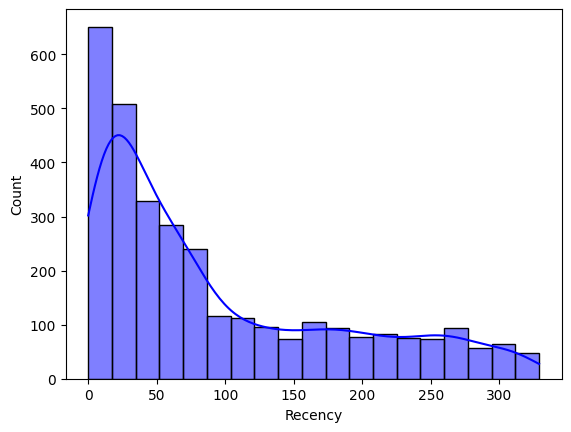

In [483]:
sns.histplot(data.Recency,kde=True,color="blue")

<Axes: xlabel='Frequency', ylabel='Count'>

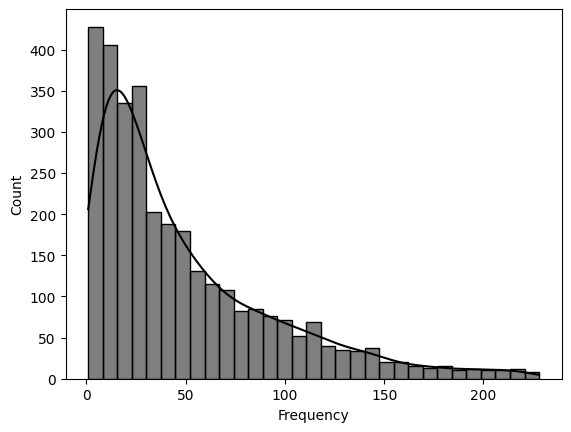

In [484]:
sns.histplot(data.Frequency,kde=True,color="black")

<Axes: xlabel='Monetary', ylabel='Count'>

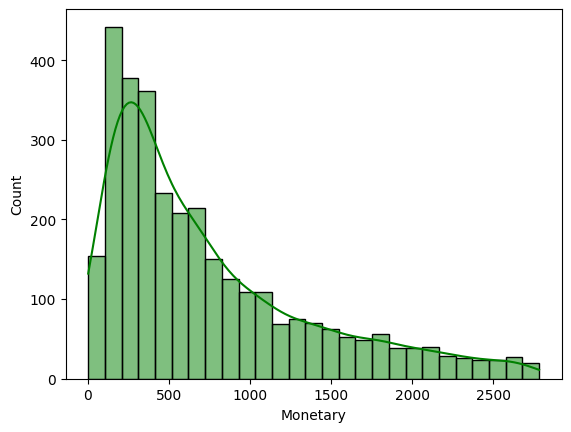

In [485]:
sns.histplot(data.Monetary,kde=True,color="green")

In [486]:
data["Recency"].replace(0,1,inplace=True)

In [487]:
data["Recency"].min()

1

In [488]:
data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

Lambda value : 0.23921326158697623


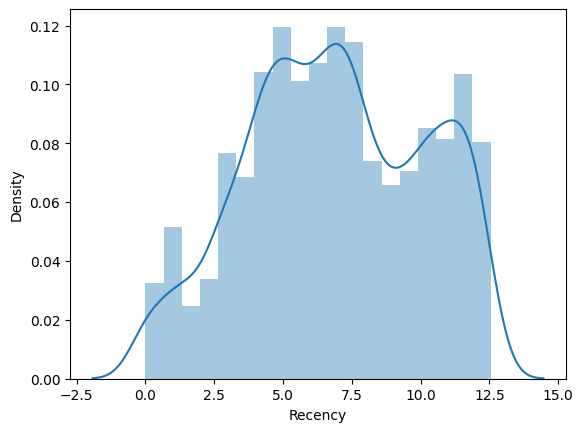

In [489]:
data["Recency"], lam_r = stats.boxcox(data["Recency"])
sns.distplot(data.Recency)
print("Lambda value :",lam_r)

Lambda value : 0.21730579181694484


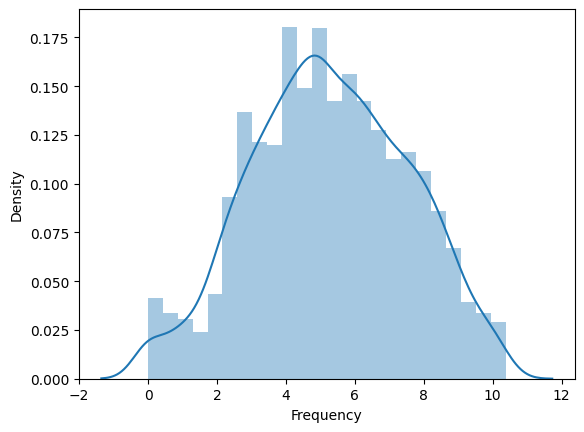

In [490]:
data["Frequency"], lam_f = stats.boxcox(data["Frequency"])
sns.distplot(data.Frequency)
print("Lambda value :",lam_f)

Lambda value : 0.1616365476662178


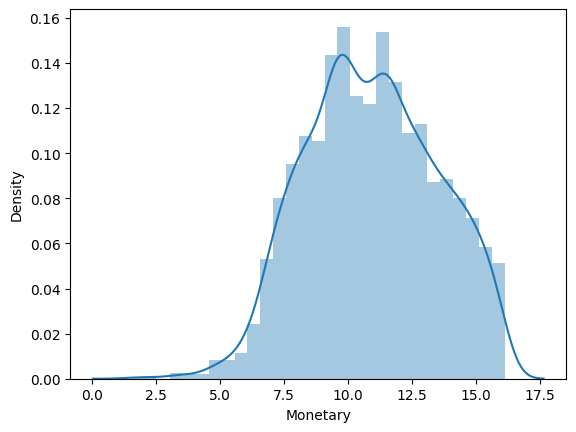

In [491]:
data["Monetary"], lam_m = stats.boxcox(data["Monetary"])
sns.distplot(data.Monetary)
print("Lambda value :",lam_m)

In [492]:
scl = StandardScaler()
c = ["Recency","Frequency","Monetary"]
data[c] = scl.fit_transform(data[c])

In [493]:
data.head()

,Recency,Frequency,Monetary
0,-1.913866,0.565076,0.631249
1,1.241106,-1.364817,-1.661527
2,0.144894,0.305520,0.640043
3,0.192992,-1.481350,1.412013
4,0.000871,-0.274070,-0.326043


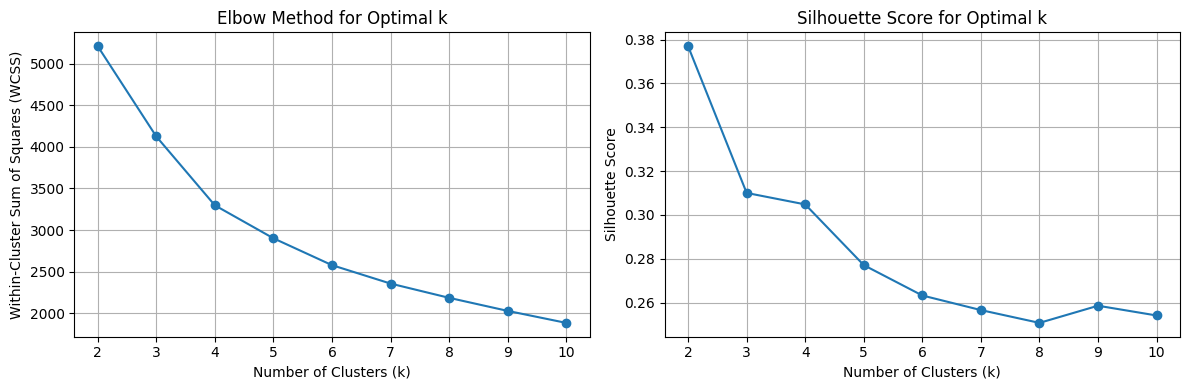

In [495]:

k_values = range(2, 11)

wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data)

    wcss.append(kmeans.inertia_)


    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Elbow method plot
ax1.plot(k_values, wcss, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette score plot
ax2.plot(k_values, silhouette_scores, marker='o')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [496]:
wcss

[5211.014663544951,
 4125.669277085845,
 3297.5029724453207,
 2901.244639272604,
 2578.133800868003,
 2356.6125612541146,
 2185.1377539172036,
 2028.170349810092,
 1883.828538070225]

## Silhouette Method

In [497]:
silhouette_scores

[0.37696886145148056,
 0.310028205240758,
 0.304793335912976,
 0.2771099765420741,
 0.2632529137251991,
 0.25659572638447264,
 0.2507563346429276,
 0.2585821651357114,
 0.25413367370646733]

Silhouette Plot for K = 5

In [498]:
kmeans = KMeans(n_clusters=5,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=5)

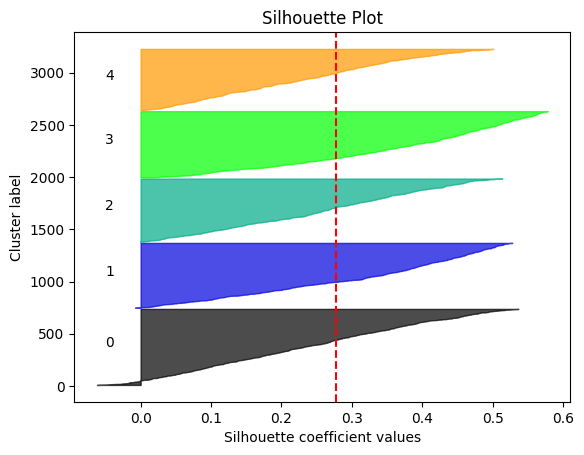

In [499]:
silhouette_plotter.generate_silhouette_plot(data, kmeans.labels_, title="Silhouette Plot")

Silhouette Plot for K = 2

In [500]:
kmeans = KMeans(n_clusters=2,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=2)

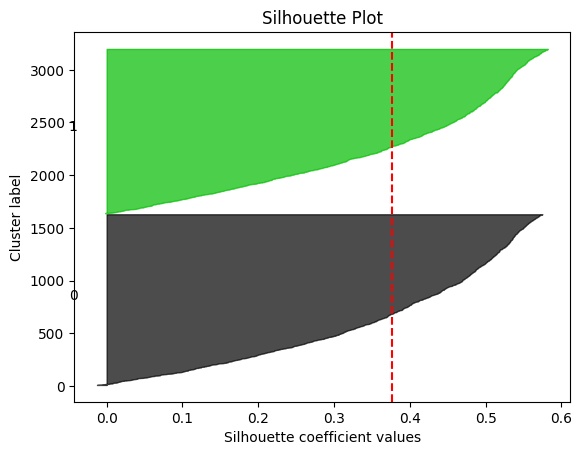

In [501]:
silhouette_plotter.generate_silhouette_plot(data, kmeans.labels_, title="Silhouette Plot")

## Custom Cluster Solution(Manhatten) , K =2 (Silhoutte_score)

In [502]:
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [503]:
centroids = random_centroids(data,2)

In [504]:
centroids

,0,1
Recency,-2.148477,1.474766
Frequency,-0.426159,-0.205082
Monetary,1.034290,-1.823683


In [505]:
# Manhattan distances
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.abs(data - x).sum(axis=1))
    labels = distances.idxmin(axis=1)
    return labels

In [506]:
# Euclidean Distance (for demo)
#def get_labels(data,centroids):
  #distances = centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
  #return distances.idxmin(axis=1)

In [507]:
labels = get_labels(data,centroids)

In [508]:
labels.value_counts()


0    1597
1    1582
dtype: int64

In [509]:
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [510]:
new_centroids(data,labels,2)

,0,1
Recency,0.187862,0.689482
Frequency,0.684972,0.341148
Monetary,0.710972,0.254931


In [511]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

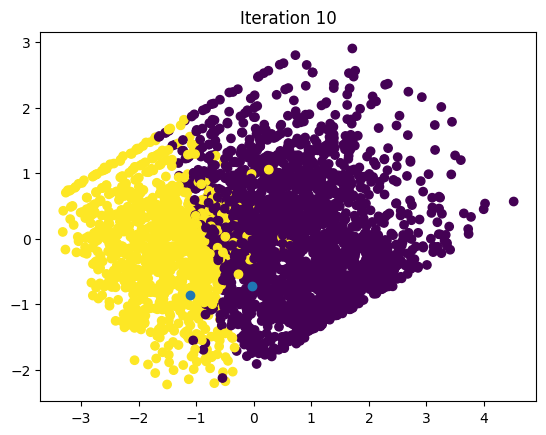

In [512]:
max_iterations = 100
centroid_count = 2

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [513]:
silhouette_score(data, labels) * 100

34.15324741471568

## Using SKlearn Cluster KMeans

In [514]:
kmeans = KMeans(n_clusters=2,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=2)

In [515]:
def plot_clusters_E(data, labels, centroids):
    pca1 = PCA(n_components=2)
    data_2d1 = pca1.fit_transform(data)
    centroids_2d1 = pca1.transform(centroids)
    clear_output(wait=True)
    plt.scatter(x=data_2d1[:,0], y=data_2d1[:,1], c=labels)
    plt.scatter(x=centroids_2d1[:,0], y=centroids_2d1[:,1])
    plt.show()

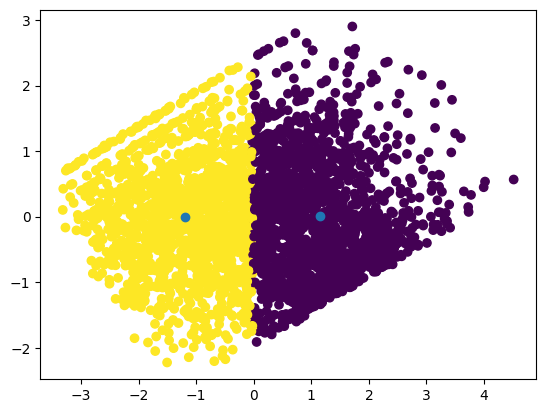

In [516]:
plot_clusters_E(data,kmeans.labels_,kmeans.cluster_centers_)

In [517]:
silhouette_score(data, kmeans.labels_) * 100

37.69592288580894

In [518]:
# For assigning labels
prd = kmeans.predict(data)

In [519]:
retail["Cluster_ID"] = prd

In [520]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel,Cluster_ID
0,12820,2,59,942,1,2,2,5,Platinum,1
1,12821,213,6,93,4,4,4,12,Bronze,0
2,12822,70,46,949,3,2,2,7,Gold,1
3,12823,74,5,1760,3,4,1,8,Silver,0
4,12824,59,25,397,3,3,3,9,Silver,0


<Axes: xlabel='Cluster_ID', ylabel='Recency'>

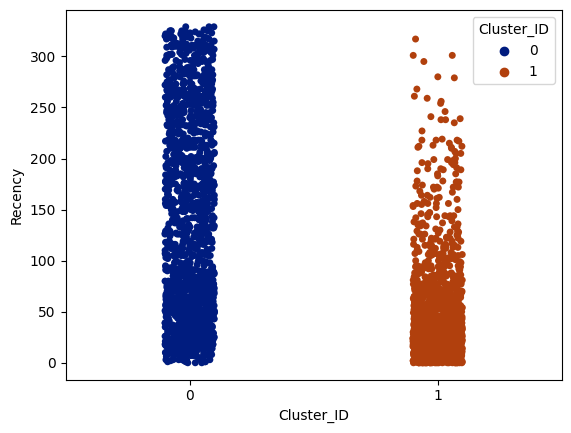

In [521]:
sns.stripplot(x="Cluster_ID",y="Recency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

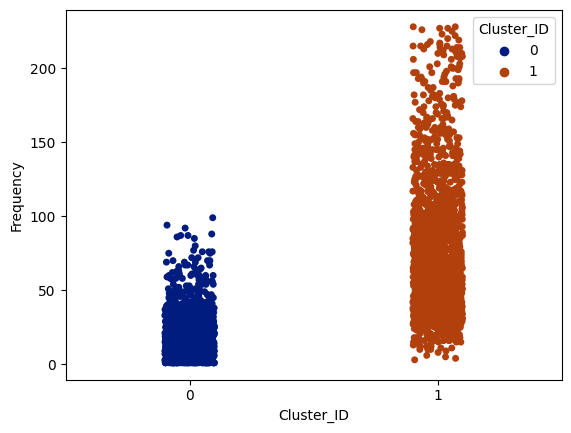

In [522]:
sns.stripplot(x="Cluster_ID",y="Frequency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Monetary'>

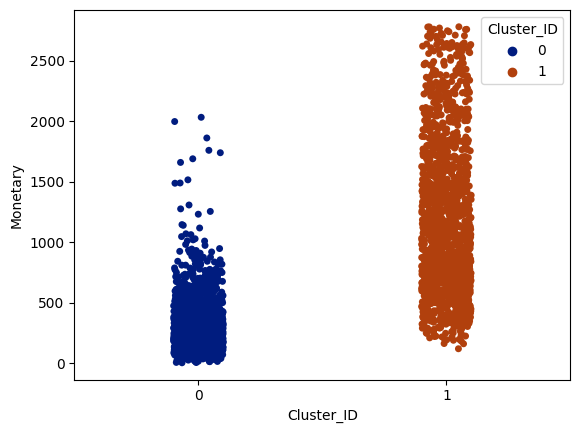

In [523]:
sns.stripplot(x="Cluster_ID",y="Monetary",data=retail,hue="Cluster_ID", palette="dark")

In [524]:
retail.groupby("Cluster_ID")["LoyaltyLevel"].value_counts()

Cluster_ID  LoyaltyLevel
0           Bronze          886
            Silver          648
            Gold             88
1           Platinum        899
            Gold            594
            Silver           64
Name: LoyaltyLevel, dtype: int64

In [525]:
retail[kmeans.labels_ == 1][["CustomerID","LoyaltyLevel"] + features]

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
0,12820,Platinum,2,59,942
2,12822,Gold,70,46,949
5,12826,Platinum,2,91,1475
6,12827,Gold,5,25,430
7,12828,Platinum,2,56,1019
...,...,...,...,...,...
3162,18259,Platinum,24,42,2339
3163,18260,Gold,172,134,2643
3166,18263,Platinum,25,61,1213
3167,18265,Gold,71,46,802


## Product Recommendation for each Clusters

In [526]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/cleanedOnlineRetail.csv")

In [527]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [528]:
merge = pd.merge(df[['CustomerID', 'Description', 'Quantity']], retail[['CustomerID',"Cluster_ID"]], on='CustomerID', how='inner')

In [529]:
merge.rename(columns={'Description': 'Product'}, inplace=True)

In [530]:
merge.head()

,CustomerID,Product,Quantity,Cluster_ID
0,13748.0,PAPER CHAIN KIT 50'S CHRISTMAS,80,1
1,13748.0,BISCUIT TIN VINTAGE GREEN,2,1
2,13748.0,ROUND CAKE TIN VINTAGE GREEN,2,1
3,13748.0,3 TIER CAKE TIN GREEN AND CREAM,2,1
4,13748.0,REGENCY CAKESTAND 3 TIER,2,1


In [531]:
recommendations_by_cluster = {}

for cluster_id in range(2):
    cluster_df = merge[merge['Cluster_ID'] == cluster_id]
    product_cluster = cluster_df.groupby("Product")["Quantity"].sum().reset_index()
    sorted_products = product_cluster.sort_values(by="Quantity", ascending=False)
    top_5_products = sorted_products.head(5)
    recommendations_by_cluster[cluster_id] = top_5_products

for cluster_id in range(2):
    cluster_recommendations = recommendations_by_cluster.get(cluster_id)
    print(f"Top 5 recommendations for Cluster {cluster_id}:\n{cluster_recommendations}\n")

Top 5 recommendations for Cluster 0:
                                  Product  Quantity
913   ESSENTIAL BALM 3.5g TIN IN ENVELOPE      5586
417                   BROCADE RING PURSE       4890
182             ASSORTED COLOURS SILK FAN      4124
2568          SMALL CHINESE STYLE SCISSOR      3698
2944   WHITE HANGING HEART T-LIGHT HOLDER      2765

Top 5 recommendations for Cluster 1:
                                 Product  Quantity
3467   WORLD WAR 2 GLIDERS ASSTD DESIGNS     12568
2961         SMALL CHINESE STYLE SCISSOR      9263
200        ASSORTED COLOUR BIRD ORNAMENT      9027
3385  WHITE HANGING HEART T-LIGHT HOLDER      6510
1596             JUMBO BAG RED RETROSPOT      6190

